In [83]:
import numpy as np
import pandas as pd
%matplotlib inline
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, LinearRegression

In [2]:
new_test = pd.read_csv('./data/new_test.csv')
new_train = pd.read_csv('./data/new_train.csv')

In [3]:
features = new_train.drop(['SalePrice'], axis = 1)
salePrice = new_train['SalePrice']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, np.log(salePrice), test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1022, 280)
X_test : (438, 280)
y_train : (1022,)
y_test : (438,)


In [63]:
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

Helper Functions

In [8]:
def rmse_cv(model, X, y):
    '''
    A helper function to calculate the cross validated RMSE
    '''
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv = 10))
    return(rmse)

In [9]:
def rmsle(model, X, y):
    '''
    Calculates rmsle as set by Kaggle
    '''
    return (math.sqrt(np.mean((np.log10(np.exp(model.predict(X))) - np.log10(np.exp(y))) ** 2)))

## Multiple Linear Regression

### Ridge
- find ideal lambda to use
- fit training/test sets to lasso

In [57]:
alphaRange = np.linspace(1e-3,100,195)
regr_cv = RidgeCV(alphas=alphaRange)
# Fit the linear regression
model_cv = regr_cv.fit(X_train, np.log(y_train))
# View alpha
model_cv.alpha_

14.433845360824739

In [61]:
ridge.set_params(alpha=0.1)
ridge.fit(X_train, np.log(y_train))
ridge.score(X_train, np.log(y_train))

0.9551842189266426

Lowest rmse:  0.12741896145415205
Optimal alpha:  [11.3]


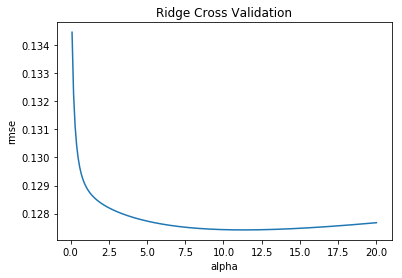

In [81]:
alphas = np.linspace(0.1,20,200)
cv_ridge = [rmse_cv(Ridge(alpha = alpha), X_train,y_train).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Ridge Cross Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")


print('Lowest rmse: ',cv_ridge.min())
print('Optimal alpha: ', cv_ridge[cv_ridge==cv_ridge.min()].index.values)

alpha = cv_ridge[cv_ridge==cv_ridge.min()].index.values

Model train accuracy (rmsle):  0.04581893493255095
Model test accuracy (rmsle):  0.07216785144915636


/home/anisha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


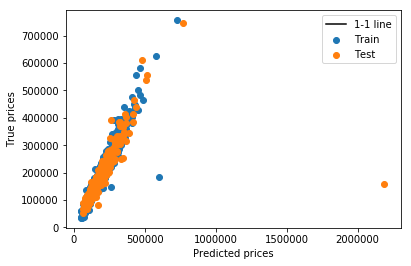

In [85]:
model_tmp = Ridge(alpha=alpha)
model_tmp = model_tmp.fit(X_train,y_train)

print('Model train accuracy (rmsle): ', rmsle(model_tmp, X_train, y_train))
print('Model test accuracy (rmsle): ', rmsle(model_tmp, X_test, y_test))

plt.scatter(np.exp(model_tmp.predict(X_train)), np.exp(y_train), label='Train')
plt.scatter(np.exp(model_tmp.predict(X_test)), np.exp(y_test), label='Test')
plt.plot(np.exp(salePrice), np.exp(salePrice), c='black', label = '1-1 line')
plt.xlabel('Predicted prices')
plt.ylabel('True prices')
_ = plt.legend()

In [88]:
model1a = Ridge(alpha=alpha)
model1a.fit(X_test,y_test)

score1a = rmsle(model1a, X_test, y_test)

print('Model accuracy rmsle: ', rmsle(model1a, X_test, y_test))

Model accuracy rmsle:  0.04376041742963136


<BarContainer object of 20 artists>

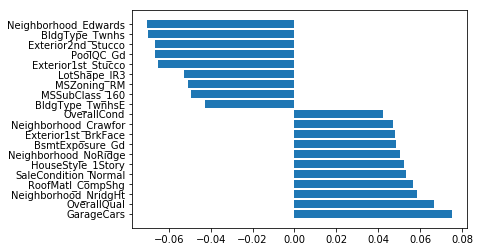

In [89]:
coefs = pd.DataFrame({'Feature':X_test.columns.values, 'Coefficient':model1a.coef_})

# Plot the most important features
coefs['sort'] = coefs.Coefficient.abs()
coefs = coefs.sort_values('sort', ascending=False).drop('sort', axis=1).head(20).sort_values('Coefficient', ascending=False)
plt.barh(coefs.Feature, coefs.Coefficient)

### Lasso

In [74]:
alphaRange = np.linspace(1e-3,100,195)
regr_cv = LassoCV(alphas=alphaRange)
# Fit the linear regression
model_cv = regr_cv.fit(X_train, np.log(y_train))
# View alpha
model_cv.alpha_

0.001

In [75]:
lasso.set_params(alpha=.0001)
lasso.fit(X_train, np.log(y_train))
lasso.score(X_train, np.log(y_train))

0.9144813233433992